In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
data = numeros['images']
classes = np.unique(target)
n_imagenes = len(target)
scaler = StandardScaler()

In [3]:
train = torch.autograd.Variable(torch.Tensor(data).float())
target = torch.autograd.Variable(torch.Tensor(target).long())


print(data.shape)

(1797, 8, 8)


In [4]:
mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)
x_train = train.unsqueeze(1)

In [98]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 10, kernel_size=4,stride=1),
            torch.nn.ReLU(True),
#             torch.nn.MaxPool2d(kernel_size=2,return_indices=False),
#             torch.nn.ReLU(True),
            torch.nn.Conv2d(10,8, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(8,10,kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(True),
#             torch.nn.MaxUnpool2d(kernel_size=2),
#             torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(10,1,kernel_size=4, stride=1),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Latency Space
print(model.encoder(x_train)[0][2].detach().numpy().shape)

# inicializa modelo, loss y optimizador
num_epochs = 700
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

(3, 3)


In [99]:
# entrenamiento
L = []
E = []
for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    E.append(epoch+1)
    L.append(loss.item())
    if (loss.item()<0.3):
        break

epoch [1/700], loss:0.9527
epoch [2/700], loss:0.9525
epoch [3/700], loss:0.9523
epoch [4/700], loss:0.9522
epoch [5/700], loss:0.9519
epoch [6/700], loss:0.9513
epoch [7/700], loss:0.9504
epoch [8/700], loss:0.9471
epoch [9/700], loss:0.9371
epoch [10/700], loss:0.9284
epoch [11/700], loss:0.9196
epoch [12/700], loss:0.9035
epoch [13/700], loss:0.8868
epoch [14/700], loss:0.8735
epoch [15/700], loss:0.8625
epoch [16/700], loss:0.8548
epoch [17/700], loss:0.8459
epoch [18/700], loss:0.8370
epoch [19/700], loss:0.8283
epoch [20/700], loss:0.8186
epoch [21/700], loss:0.8094
epoch [22/700], loss:0.8007
epoch [23/700], loss:0.7921
epoch [24/700], loss:0.7850
epoch [25/700], loss:0.7793
epoch [26/700], loss:0.7734
epoch [27/700], loss:0.7670
epoch [28/700], loss:0.7603
epoch [29/700], loss:0.7541
epoch [30/700], loss:0.7482
epoch [31/700], loss:0.7424
epoch [32/700], loss:0.7370
epoch [33/700], loss:0.7322
epoch [34/700], loss:0.7278
epoch [35/700], loss:0.7233
epoch [36/700], loss:0.7186
e

epoch [288/700], loss:0.3651
epoch [289/700], loss:0.3652
epoch [290/700], loss:0.3655
epoch [291/700], loss:0.3656
epoch [292/700], loss:0.3656
epoch [293/700], loss:0.3653
epoch [294/700], loss:0.3657
epoch [295/700], loss:0.3659
epoch [296/700], loss:0.3667
epoch [297/700], loss:0.3662
epoch [298/700], loss:0.3660
epoch [299/700], loss:0.3649
epoch [300/700], loss:0.3643
epoch [301/700], loss:0.3640
epoch [302/700], loss:0.3641
epoch [303/700], loss:0.3642
epoch [304/700], loss:0.3641
epoch [305/700], loss:0.3639
epoch [306/700], loss:0.3638
epoch [307/700], loss:0.3642
epoch [308/700], loss:0.3652
epoch [309/700], loss:0.3686
epoch [310/700], loss:0.3699
epoch [311/700], loss:0.3737
epoch [312/700], loss:0.3654
epoch [313/700], loss:0.3640
epoch [314/700], loss:0.3681
epoch [315/700], loss:0.3660
epoch [316/700], loss:0.3634
epoch [317/700], loss:0.3640
epoch [318/700], loss:0.3651
epoch [319/700], loss:0.3642
epoch [320/700], loss:0.3626
epoch [321/700], loss:0.3639
epoch [322/700

epoch [571/700], loss:0.3549
epoch [572/700], loss:0.3575
epoch [573/700], loss:0.3543
epoch [574/700], loss:0.3555
epoch [575/700], loss:0.3575
epoch [576/700], loss:0.3532
epoch [577/700], loss:0.3563
epoch [578/700], loss:0.3571
epoch [579/700], loss:0.3537
epoch [580/700], loss:0.3566
epoch [581/700], loss:0.3552
epoch [582/700], loss:0.3553
epoch [583/700], loss:0.3564
epoch [584/700], loss:0.3530
epoch [585/700], loss:0.3564
epoch [586/700], loss:0.3561
epoch [587/700], loss:0.3533
epoch [588/700], loss:0.3560
epoch [589/700], loss:0.3548
epoch [590/700], loss:0.3554
epoch [591/700], loss:0.3550
epoch [592/700], loss:0.3531
epoch [593/700], loss:0.3562
epoch [594/700], loss:0.3545
epoch [595/700], loss:0.3534
epoch [596/700], loss:0.3549
epoch [597/700], loss:0.3535
epoch [598/700], loss:0.3546
epoch [599/700], loss:0.3535
epoch [600/700], loss:0.3526
epoch [601/700], loss:0.3544
epoch [602/700], loss:0.3533
epoch [603/700], loss:0.3532
epoch [604/700], loss:0.3535
epoch [605/700

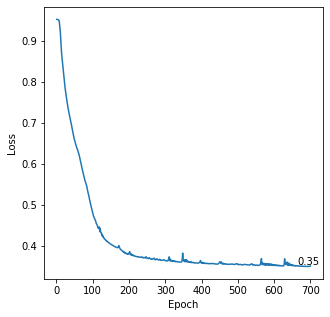

In [100]:
fig = plt.figure(figsize=(5,5))
plt.plot(E,L)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.text(E[-1]-E[-1]/20,L[-1]+L[-1]/100,round(L[-1],2))
plt.show()

In [101]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

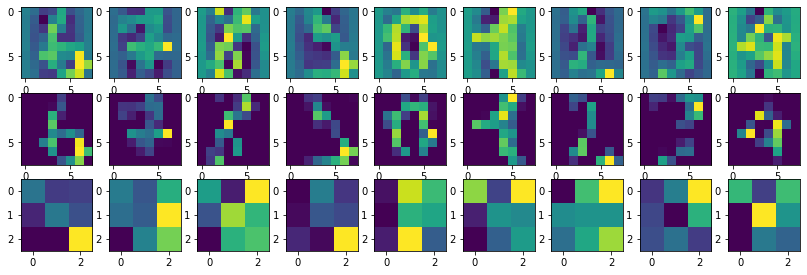

In [102]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 16
n = 9
for i in range(n):
    plt.subplot(n,n,i+1) #imagenes originales
    plt.imshow(x_train[i+offset][0].detach().numpy())
#     plt.title(classes[targets[i+offset]] )
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(n,n,(i+1)+n*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(n,n,(i+1)+n*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())